<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/EfficientNetB0_scooters1110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [23]:
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [24]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*.jpg") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.jpg") + glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*.JPG") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.JPG") 

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")



force = glob.glob("./原始照片(含外拍及網路)/YAMAHA_FORCE/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_FORCE_裁/*")

viva = glob.glob("./原始照片(含外拍及網路)/GOGORO_VIVA_MIX/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S3/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S3_裁/*")

like = glob.glob("./原始照片(含外拍及網路)/KYMCO_LIKE/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_LIKE_125_裁/*")

many = glob.glob("./原始照片(含外拍及網路)/KYMCO_MANY/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_MANY_125_裁/*")

bws = glob.glob("./原始照片(含外拍及網路)/YAMAHA_BWS/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_BWS_125_裁/*")

sl = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SL/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SL_125_裁/*")

axiz = glob.glob("./原始照片(含外拍及網路)/YAMAHA_勁豪/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("./原始照片(含外拍及網路)/YAMAHA_JOG/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/*")

In [25]:
print(len(trans))

20


In [26]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
2,./原始照片(含外拍及網路)/GOGORO_S2/01_s2_abs_indigo_03_l...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/1527683192-25814e6d13...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/3FA8F684E6-SP-9712488...,0
...,...,...
13811,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/121920.jpg,19
13812,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1513.JPG,19
13813,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1517.JPG,19
13814,./裁剪照片(不含不用裁的)/YAMAHA_JOG_125_裁/IMG_1518.JPG,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 961 1081  898 1317  793  914  893  900 1197  786 1316  261  132  414
  331  477   99  448  461  137]


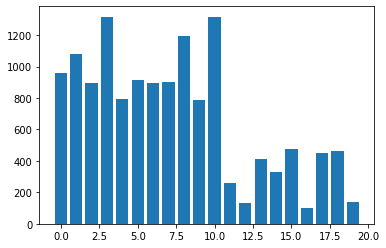

In [27]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/119239.jpg
[[[183 183 185]
  [162 162 164]
  [148 147 151]
  ...
  [136 141 136]
  [141 146 141]
  [145 150 145]]

 [[189 189 191]
  [159 158 161]
  [133 132 136]
  ...
  [ 82  85  87]
  [ 88  92  94]
  [ 98 102 103]]

 [[175 175 177]
  [137 137 139]
  [107 106 109]
  ...
  [ 62  65  72]
  [ 64  67  75]
  [ 67  69  75]]

 ...

 [[195 184 180]
  [197 186 182]
  [193 182 178]
  ...
  [194 185 183]
  [192 182 180]
  [194 184 181]]

 [[194 183 179]
  [200 190 185]
  [199 188 184]
  ...
  [192 183 180]
  [193 183 182]
  [194 185 182]]

 [[201 190 188]
  [196 185 183]
  [200 191 186]
  ...
  [197 188 185]
  [194 184 182]
  [199 190 188]]]


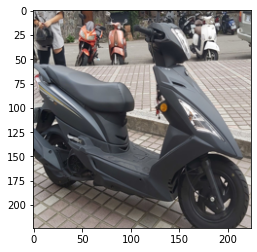

In [28]:
p = df["path"]

idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
# idx
path = p[idx]
# print(path.shape)

# img = cv2.imread(path)
# plt.imshow(img[:, :, ::-1])

img = Image.open(path).resize((224, 224)).convert("RGB")
img_np = np.array(img)
print(path)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)
# print(img)

In [29]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [30]:
base_model = EfficientNetB0(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

In [32]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [33]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[237 235 221]
   [153 154 140]
   [117 131 113]
   ...
   [143 171 150]
   [136 167 149]
   [131 162 146]]

  [[200 203 155]
   [145 148 116]
   [120 127 114]
   ...
   [148 176 151]
   [131 162 140]
   [128 158 141]]

  [[189 201 134]
   [155 164 119]
   [120 123 111]
   ...
   [178 195 180]
   [168 187 172]
   [159 177 165]]

  ...

  [[126 123 120]
   [118 116 111]
   [120 118 112]
   ...
   [152 147 137]
   [143 137 130]
   [155 150 143]]

  [[130 130 125]
   [137 135 130]
   [138 137 132]
   ...
   [159 152 143]
   [140 132 120]
   [152 144 134]]

  [[135 135 130]
   [130 130 125]
   [128 127 122]
   ...
   [154 146 136]
   [147 139 130]
   [158 147 140]]]


 [[[131 127 124]
   [130 127 124]
   [126 126 122]
   ...
   [136 153  61]
   [126 143  63]
   [112 121  48]]

  [[137 132 129]
   [136 133 130]
   [138 138 133]
   ...
   [116 134  49]
   [119 137  60]
   [116 132  54]]

  [[144 142 141]
   [153 151 152]
   [150 150 148]
   ...
   [106 126  39]
   [124 142  57]
   [132 151

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12434,)
(1382,)
(12434,)
(1382,)


In [35]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.99
keras.callbacks.LearningRateScheduler(scheduler)


callbacks = [
             EarlyStopping(patience=12, restore_best_weights=True),
             ModelCheckpoint("/content/1110all.h5", save_best_only=True),
             LearningRateScheduler(scheduler)
]

model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=500,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/500
20/20 [==============================] - ETA: 0s - loss: 2.9328 - acc: 0.1225

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


20/20 [==============================] - 195s 8s/step - loss: 2.9328 - acc: 0.1225 - val_loss: 2.6243 - val_acc: 0.1667 - lr: 0.0010
Epoch 2/500
20/20 [==============================] - 164s 9s/step - loss: 2.6436 - acc: 0.2050 - val_loss: 2.3857 - val_acc: 0.3333 - lr: 0.0010
Epoch 3/500
20/20 [==============================] - 157s 8s/step - loss: 2.5942 - acc: 0.2475 - val_loss: 2.4243 - val_acc: 0.2667 - lr: 0.0010
Epoch 4/500
20/20 [==============================] - 151s 8s/step - loss: 2.4287 - acc: 0.2625 - val_loss: 2.3860 - val_acc: 0.3000 - lr: 0.0010
Epoch 5/500
20/20 [==============================] - 148s 8s/step - loss: 2.2820 - acc: 0.3325 - val_loss: 2.4290 - val_acc: 0.3000 - lr: 0.0010
Epoch 6/500
20/20 [==============================] - 146s 8s/step - loss: 2.2332 - acc: 0.3650 - val_loss: 2.0272 - val_acc: 0.4333 - lr: 0.0010
Epoch 7/500
20/20 [==============================] - 137s 7s/step - loss: 2.1334 - acc: 0.4025 - val_loss: 2.0820 - val_acc: 0.4000 - lr: 0.00

# Grad-CAM

In [37]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [38]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [39]:
model = load_model("/content/1106all.h5")
model.summary()

OSError: ignored

In [ ]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (300,300)))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# print(decode_predictions(preds))

In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("Conv_1_bn")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(path)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img

In [ ]:
cv2_imshow(cv2.resize(cv2.imread(path), (320,320)))
cv2_imshow(cv2.resize(img, (320,320)))

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)

pre = pre.argmax(axis=1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(20)],
        columns=["{}(預測)".format(trans[i]) for i in range(20)])

In [ ]:

import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)